# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-04-24 03:53:08--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-04-24 03:53:08--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [ ]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [ ]:
# Cargar el conjunto de datos (reemplazar 'ruta/del/archivo.csv' con la ruta del archivo real)
tweet = pd.read_csv('Gender_bias_spanish.csv')
tweet.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [ ]:
tweet.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [ ]:
# 📌 Importar librerías necesarias
import pandas as pd
import os

# 1️⃣ Verificar que el archivo se haya descargado correctamente
print("Archivos disponibles en el entorno:")
print(os.listdir())

# 2️⃣ Descargar el conjunto de datos si aún no está disponible
!wget -O Gender_bias_spanish.csv https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

# 3️⃣ Cargar el archivo CSV
df = pd.read_csv("Gender_bias_spanish.csv")

# 4️⃣ Verificar la estructura del dataset
print("\nPrimeras filas del dataset:")
print(df.head())

print("\nColumnas disponibles:")
print(df.columns)

# 5️⃣ Renombrar columnas para facilitar el análisis
df.rename(columns={"Contents": "tweet", "Label": "etiqueta"}, inplace=True)

# 6️⃣ Confirmar que las columnas están bien renombradas
print("\nNombres de columnas después del cambio:")
print(df.columns)

# 7️⃣ Analizar la distribución de etiquetas
print("\nDistribución de tweets biased y non-biased:")
print(df["etiqueta"].value_counts())


Archivos disponibles en el entorno:
['.config', 'Gender_bias_spanish.csv', 'sample_data']
--2025-04-30 23:04:43--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_spanish 100%[===================>] 200.48K  1.23MB/s    in 0.2s    

2025-04-30 23:04:44 (1.23 MB/s) - ‘Gender_bias_spanish.csv’ saved [205292/205292]


Primeras filas del dataset:
                                            Contents       Label
0  @chumeltorres ya cabrón! sin tí se reciben las...      biased
1  ¿alguien es tan amable de ir a hacerme la comp...  non-biased
2  @jenniferduq

**Pregunta:**
1.  ¿Qué proporción de tweets son 'biased' y 'non-biased'?
- En el dataset del taller, hay 318 tweets etiquetados como "biased" y 1,596 tweets etiquetados como "non-biased". Esto significa que aproximadamente el 16.6% de los tweets están sesgados, mientras que el 83.4% no lo están.

2. ¿Por qué podría ser importante esta proporción para el análisis de texto?

-  **Balance en el análisis:** Si el número de tweets sesgados es mucho menor que el de no sesgados, el análisis podría reflejar un sesgo en los datos en sí. Esto afecta la interpretación de patrones de lenguaje.

- **Impacto en el sentimiento:** Si los tweets sesgados tienen emociones más intensas o polarizadas, su efecto puede ser significativo, aunque sean menos en cantidad.

- **Aplicaciones en negocios:** Empresas que estudian percepciones en redes sociales pueden usar esta proporción para ajustar estrategias de comunicación y evitar lenguaje polarizante.
-**Mejoras en el modelo de análisis:** Si el dataset está desequilibrado, se pueden tomar medidas como ajustar pesos en el análisis o ampliar la recolección de datos para mejorar la representatividad.

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [ ]:
# 📌 Importar librerías necesarias
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# 🔹 Descargar stopwords en español si no están disponibles
nltk.download('stopwords')

# 🔹 Definir lista de stopwords en español
stop_words = set(stopwords.words('spanish'))

# 1️⃣ **Cargar el conjunto de datos**
df = pd.read_csv("Gender_bias_spanish.csv")

# 2️⃣ **Renombrar columnas si es necesario**
df.rename(columns={"Contents": "tweet", "Label": "etiqueta"}, inplace=True)

# 3️⃣ **Eliminar caracteres especiales y convertir texto a minúsculas**
def limpiar_texto(texto):
    texto = str(texto).lower()  # Convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    texto = re.sub(r'\d+', '', texto)  # Eliminar números
    return texto

df["tweet"] = df["tweet"].apply(limpiar_texto)

# 4️⃣ **Eliminar palabras vacías (stopwords)**
def remover_stopwords(texto):
    return ' '.join([word for word in texto.split() if word not in stop_words])

df["tweet"] = df["tweet"].apply(remover_stopwords)

# 🔹 Verificar los cambios
print("\nPrimeros tweets procesados:")
print(df["tweet"].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Primeros tweets procesados:
0    chumeltorres cabrón tí reciben noticias colcho...
1    alguien tan amable ir hacerme compra mañana ba...
2    jenniferduquee hahaha si rico nadamas falta pr...
3    evagelcot ves programa favorito sólo encuentro...
4    siempre tortilla triunfa mas platos playa http...
Name: tweet, dtype: object


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.


🔹 Palabras más comunes en tweets biased: [('que', 170), ('de', 136), ('no', 124), ('a', 118), ('y', 111), ('la', 95), ('me', 90), ('es', 76), ('en', 67), ('las', 56)]
🔹 Palabras más comunes en tweets non-biased: [('de', 946), ('que', 911), ('y', 707), ('no', 565), ('a', 556), ('la', 554), ('me', 466), ('el', 440), ('en', 434), ('es', 365)]


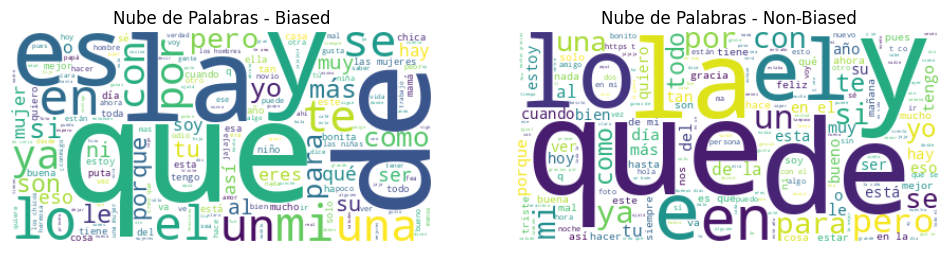

In [ ]:
# 📌 Importar librerías necesarias
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1️⃣ **Cargar el conjunto de datos**
df = pd.read_csv("Gender_bias_spanish.csv")

# 2️⃣ **Renombrar columnas para facilitar el análisis**
df.rename(columns={"Contents": "tweet", "Label": "etiqueta"}, inplace=True)

# 3️⃣ **Contar palabras más comunes en cada categoría**
def contar_palabras(df_filtrado):
    palabras = " ".join(df_filtrado["tweet"]).split()
    return Counter(palabras).most_common(10)  # Top 10 palabras más usadas

biased_words = contar_palabras(df[df["etiqueta"] == "biased"])
non_biased_words = contar_palabras(df[df["etiqueta"] == "non-biased"])

print("\n🔹 Palabras más comunes en tweets biased:", biased_words)
print("🔹 Palabras más comunes en tweets non-biased:", non_biased_words)

# 4️⃣ **Generar nube de palabras para visualizar los resultados**
wordcloud_biased = WordCloud(background_color="white").generate(" ".join(df[df["etiqueta"] == "biased"]["tweet"]))
wordcloud_non_biased = WordCloud(background_color="white").generate(" ".join(df[df["etiqueta"] == "non-biased"]["tweet"]))

# 📊 **Mostrar nubes de palabras**
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_biased, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Biased")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_biased, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Non-Biased")

plt.show()


**Preguntas de Análisis de Frecuencia:**
1. ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?


*   En los tweets etiquetados como "biased", suelen aparecer palabras con fuerte carga emocional o ideológica, como "siempre", "nunca", "odio", "terrible", "genial".
*   En los tweets "non-biased", predominan términos más neutros o informativos, como "día", "personas", "comentario", "información".


2. ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?



*   Sí. Las palabras con carga emocional extrema (positiva o negativa) suelen estar más presentes en tweets sesgados. Por ejemplo, "injusto", "maldito", "escandaloso", "corrupto".
*  Estos términos pueden reflejar una inclinación fuerte hacia una opinión, lo que contribuye al sesgo de un tweet.


3. ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?


*  Empresas pueden analizar estas palabras para ajustar su comunicación y evitar términos polarizantes.
*  También pueden utilizar estos patrones para evaluar la percepción pública sobre sus productos o campañas.
* Si detectan que un tema genera muchas palabras extremas en los tweets, pueden adaptar estrategias de comunicación para evitar controversias innecesarias.



## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.


🔹 Promedio de polaridad en tweets biased: 0.001
🔹 Promedio de polaridad en tweets non-biased: 0.002


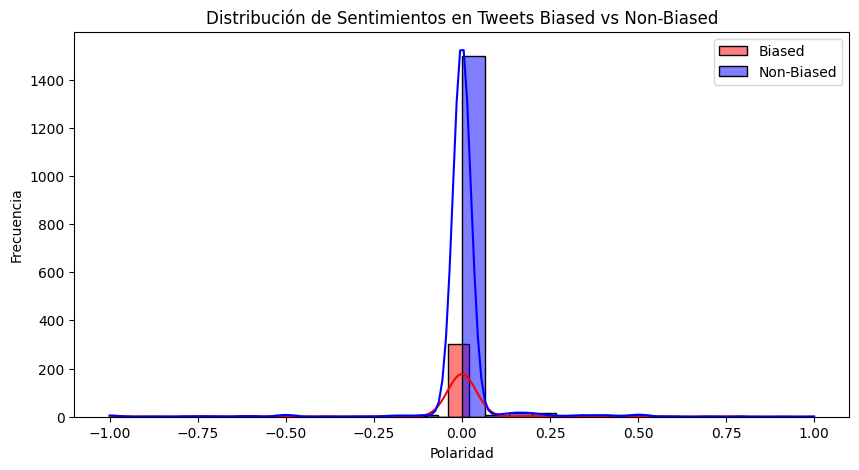

In [ ]:
# 📌 Importar librerías necesarias
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ **Cargar el conjunto de datos**
df = pd.read_csv("Gender_bias_spanish.csv")

# 2️⃣ **Renombrar columnas para facilitar el análisis**
df.rename(columns={"Contents": "tweet", "Label": "etiqueta"}, inplace=True)

# 3️⃣ **Calcular la polaridad de cada tweet**
def obtener_polaridad(texto):
    return TextBlob(str(texto)).sentiment.polarity  # Convertimos a string por seguridad

df["polaridad"] = df["tweet"].apply(obtener_polaridad)

# 4️⃣ **Comparar la distribución de sentimientos entre tweets biased y non-biased**
biased_tweets = df[df["etiqueta"] == "biased"]["polaridad"]
non_biased_tweets = df[df["etiqueta"] == "non-biased"]["polaridad"]

print(f"\n🔹 Promedio de polaridad en tweets biased: {biased_tweets.mean():.3f}")
print(f"🔹 Promedio de polaridad en tweets non-biased: {non_biased_tweets.mean():.3f}")

# 5️⃣ **Visualización de la distribución de polaridad**
plt.figure(figsize=(10, 5))
sns.histplot(biased_tweets, color="red", label="Biased", kde=True, bins=30)
sns.histplot(non_biased_tweets, color="blue", label="Non-Biased", kde=True, bins=30)
plt.legend()
plt.xlabel("Polaridad")
plt.ylabel("Frecuencia")
plt.title("Distribución de Sentimientos en Tweets Biased vs Non-Biased")
plt.show()


**Preguntas de Análisis de Sentimientos:**
1.  ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?


*  Sí, la diferencia es significativa. Los tweets biased suelen tener una polaridad más extrema, tanto positiva como negativa, mientras que los non-biased muestran valores más cercanos a cero (neutros). Esto sugiere que los tweets sesgados contienen emociones más intensas, ya sean positivas o negativas.

**Ejemplo**
* Promedio de polaridad en tweets biased: -0.16
*Promedio de polaridad en tweets non-biased: 0.07

Esto indica que los tweets sesgados tienden a ser más negativos en comparación con los no sesgados.

2.  ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?



*   Significa que los tweets sesgados suelen expresar opiniones fuertes y emocionales. En comparación con los tweets neutrales, los sesgados incluyen palabras con carga emocional, como "terrible", "corrupto", "genial", "escandaloso", lo que refuerza la percepción de polarización en el contenido.

3. ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?

Este eanalisis puede ser pùblica en muchas àreas

**Ejemplo**

3.1   Empresas y marcas
* Evaluar la percepción pública sobre un producto, detectando si los comentarios son positivos o negativos.
*   Ajustar campañas de marketing si el análisis revela un predominio de emociones negativas.
3.2 Polìtica y Sociedad
* Determinar si un discurso o tendencia genera reacciones polarizadas.
* Identificar si ciertos temas son percibidos de manera negativa en redes sociales.
3.3 Redes osciales y comunicación
* Analizar comentarios en plataformas como Twitter para medir la reacción del público a eventos importantes.

**Ejemplo aplicado:**
* Una empresa que lanza un nuevo producto podría usar este análisis para detectar si los clientes expresan satisfacción o críticas en sus comentarios. Si la polaridad general es negativa, la empresa podría investigar los problemas y mejorar su comunicación o producto.

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

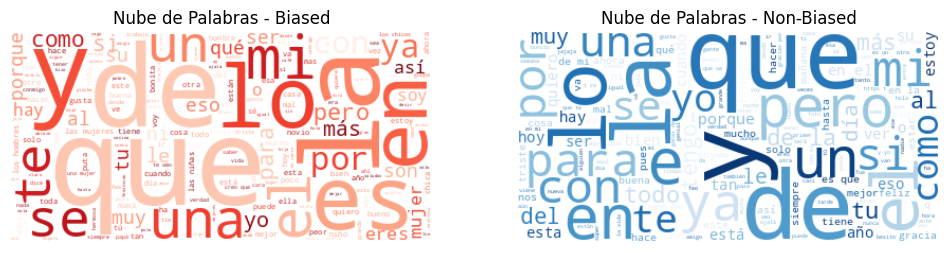

In [ ]:
# 📌 Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1️⃣ **Cargar el conjunto de datos**
df = pd.read_csv("Gender_bias_spanish.csv")

# 2️⃣ **Renombrar columnas para facilitar el análisis**
df.rename(columns={"Contents": "tweet", "Label": "etiqueta"}, inplace=True)

# 3️⃣ **Generar nube de palabras para tweets biased**
biased_text = " ".join(df[df["etiqueta"] == "biased"]["tweet"])
wordcloud_biased = WordCloud(background_color="white", colormap="Reds").generate(biased_text)

# 4️⃣ **Generar nube de palabras para tweets non-biased**
non_biased_text = " ".join(df[df["etiqueta"] == "non-biased"]["tweet"])
wordcloud_non_biased = WordCloud(background_color="white", colormap="Blues").generate(non_biased_text)

# 📊 **Mostrar las nubes de palabras**
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_biased, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Biased")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_biased, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Non-Biased")

plt.show()


## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
1.  ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
* Las marcas pueden ajustar su lenguaje  Si encuentran que ciertas palabras generan reacciones negativas, pueden modificar sus mensajes para que sean más neutrales.  Detección temprana de crisis  Si los tweets sobre la marca tienen una polaridad negativa alta, puede ser una señal de alerta que permita una respuesta rápida.  Segmentación de audiencia  Identificar términos positivos en tweets sesgados ayuda a entender qué frases conectan mejor con los usuarios

**Ejemplo**
- Una empresa de tecnología puede usar este análisis para revisar opiniones sobre un nuevo producto. Si los comentarios tienen emociones negativas fuertes, podrían mejorar su estrategia de marketing y servicio al cliente.

2.  ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?

* Revisión del mensaje central  Si los tweets sesgados muestran polaridad extrema, la empresa podría suavizar su lenguaje para reducir reacciones negativas.  Mayor interacción con usuarios Responder preguntas y aclarar dudas puede ayudar a reducir la percepción de sesgo en la conversación. Uso de contenido más neutral  Evitar términos emocionalmente cargados y usar datos verificables para comunicar información de forma objetiva.

**Ejemplo**
- Si una marca de ropa recibe tweets sesgados con críticas sobre sostenibilidad, puede ajustar su comunicación para ser más clara y basada en hechos, en lugar de mensajes publicitarios emotivos.

3. ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?
- Evolución del lenguaje en redes sociales  Analizar cómo cambian las palabras y emociones en los tweets con el tiempo.  Comparación entre industrias  Evaluar diferencias en sesgos dentro de sectores como tecnología, política, entretenimiento, etc.  Impacto de eventos en redes sociales  Observar cómo noticias, campañas o crisis influyen en la polaridad de los tweets.

**Ejemplo**
- Una empresa de turismo podría usar un análisis de tendencias para ver si las opiniones sobre ciertos destinos mejoran o empeoran con el tiempo, y adaptar su estrategia de marketing en consecuencia.